In [1]:
#import basic library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\Admin\\Desktop\\Shraddha_Patil\\AWP'

In [3]:
#to load dataset
df = pd.read_csv("iris.csv")

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#check the null value in given dataset
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

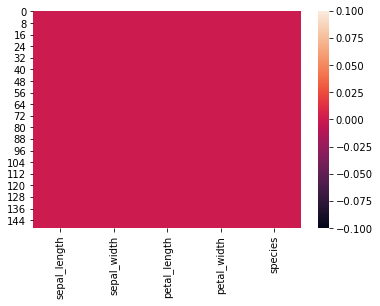

In [6]:
#visualize the null value
sb.heatmap(df.isnull())
plt.show()

In [7]:
#cross check, check datatypes each columns
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
#to check the duplicates value
df.duplicated().sum()

3

In [9]:
#to show duplicate row's record
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [10]:
#to delete duplicate row's records
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
#how many rows and columns
df.shape

(147, 5)

In [13]:
#how many category in output variable species
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [14]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64


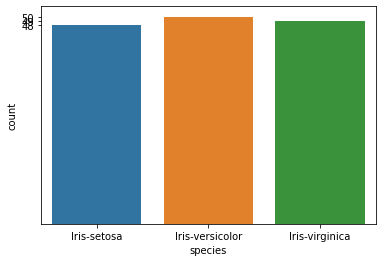

In [15]:
sb.countplot(data=df,x='species')
f=df['species'].value_counts()
print(f)
plt.yticks(f)
plt.show()

In [16]:
#apply labelencoder for species o/p column, to change 
#object type data to number type
from sklearn.preprocessing import LabelEncoder
#create object of LabelEncoder class
le=LabelEncoder()
df['species']=le.fit_transform(df[['species']])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
#select input and output
x=df.drop('species',axis=1) #input
y=df['species']  #output

In [18]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [19]:
x_train.shape,x_test.shape

((102, 4), (45, 4))

In [20]:
y_train.value_counts()

2    35
1    34
0    33
Name: species, dtype: int64

In [21]:
y_test.value_counts()

1    16
0    15
2    14
Name: species, dtype: int64

In [22]:
#first apply scalling on input data before train the test
#Apply standard scaler for input data training and testing
from sklearn.preprocessing import StandardScaler
#create object of class StandardScaler
ss=StandardScaler()
#meas apply standard scaler for x_train data
x_train=ss.fit_transform(x_train)    #converts in numpy array
x_test=ss.transform(x_test)     #also converts into numpy array

In [23]:
#create a function
def create_model(model):   #user defined function
    #model user defined object which hold the object of algorithm
    #first train the model with 70% data
    model.fit(x_train,y_train)
    #then test the model with 30% data
    y_pred=model.predict(x_test)
    #generate report
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    return model

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
#base line model of classification algo
#call inbuilt class LogisticRegression
from sklearn.linear_model import LogisticRegression

In [26]:
#create object of LogisticRegression class
lr=LogisticRegression()

In [27]:
#call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]


In [ ]:
#Naive bayes theorem :- 
#Gaussian Naive bayes theorem : -
#input should be contineous numeric 
#and output should be categorical type means yes/no
#Naive Bayes theorem works on conditional probability
#formula of conditional probability :
'''
P(A|B)=P(B|A)*P(A)/P(B)
'''

In [28]:
#Apply Naive Bayes Theorem
from sklearn.naive_bayes import GaussianNB
#inbuilt class GaussianNB

In [29]:
#craete object of GaussianNB class
gnb=GaussianNB()

In [30]:
gnb=create_model(gnb)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.94      0.91        16
           2       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

[[15  0  0]
 [ 0 15  1]
 [ 0  2 12]]
